In [9]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [10]:
def generate_model(layers):
    
    model = {}
    model["input_size"] = layers[0]
    model["output_size"] = layers[-1]
    
    seq = []
    
    for l in range(1, len(layers)):
        w = np.random.randn(layers[l-1], layers[l])
        b = np.zeros([layers[l]])
        seq.append((w, b))
    
    model["seq"] = seq

    return model

In [11]:
m = generate_model([2, 3, 2, 3])

In [12]:
m

{'input_size': 2,
 'output_size': 3,
 'seq': [(array([[-0.21231812, -1.38461704,  2.03912291],
          [ 0.17611878,  0.49423768,  0.87888747]]), array([0., 0., 0.])),
  (array([[ 0.58021654, -1.26644034],
          [ 0.4268335 , -0.72594557],
          [-1.99917742,  0.77612832]]), array([0., 0.])),
  (array([[ 2.23091366,  2.40711323,  0.47805534],
          [-0.05606261,  0.57216846,  0.22035792]]), array([0., 0., 0.]))]}

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def soft_max(z):
    ex = np.exp(z)
    print(ex.shape)
    total = np.sum(ex, axis=1, keepdims=1)
    
    return ex/total
    

In [44]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2)

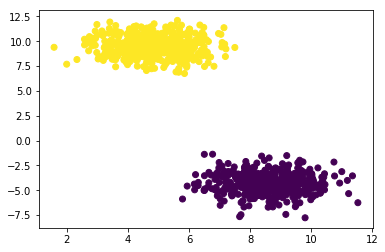

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [46]:
def forward_pass(x_data, model):
    
    a = x_data
    seq = model["seq"]
    for i, layer in enumerate(seq):
        w = layer[0]
        b = layer[1]
        
        z = np.dot(a, w) - b
        
        if i < len(seq) - 1:
            a = sigmoid(z)
        else:
            a = soft_max(z)
    
    return a

In [48]:
m1 = generate_model([2, 5, 100, 200, 2])

res = forward_pass(X, m1)

print(res[:10])

(1000, 2)
[[0.00888479 0.99111521]
 [0.19701776 0.80298224]
 [0.12553857 0.87446143]
 [0.00726728 0.99273272]
 [0.00851764 0.99148236]
 [0.00723575 0.99276425]
 [0.19508653 0.80491347]
 [0.09192397 0.90807603]
 [0.19721473 0.80278527]
 [0.00844277 0.99155723]]


In [96]:
nums = np.array([1, 2, 1, 2])

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [100]:
en = OneHotEncoder(categories="auto")

In [102]:
en.fit(y.reshape(-1, 1))

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [104]:
t = en.transform(y.reshape(-1, 1))

In [105]:
print(t.todense())

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
